In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [ ]:
df = pd.read_csv('/content/278k_labelled_uri 2.csv')

In [ ]:
df.head()

,Unnamed: 0.1,Unnamed: 0,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate,labels,uri
0,0,0,195000.0,0.611,0.614,-8.815,0.0672,0.0169,0.000794,0.7530,0.520,128.050,3.446154e-07,2.0,spotify:track:3v6sBj3swihU8pXQQHhDZo
1,1,1,194641.0,0.638,0.781,-6.848,0.0285,0.0118,0.009530,0.3490,0.250,122.985,1.464234e-07,1.0,spotify:track:7KCWmFdw0TzoJbKtqRRzJO
2,2,2,217573.0,0.560,0.810,-8.029,0.0872,0.0071,0.000008,0.2410,0.247,170.044,4.007850e-07,1.0,spotify:track:2CY92qejUrhyPUASawNVRr
3,3,3,443478.0,0.525,0.699,-4.571,0.0353,0.0178,0.000088,0.0888,0.199,92.011,7.959809e-08,0.0,spotify:track:11BPfwVbB7vok7KfjBeW4k
4,4,4,225862.0,0.367,0.771,-5.863,0.1060,0.3650,0.000001,0.0965,0.163,115.917,4.693131e-07,1.0,spotify:track:3yUJKPsjvThlcQWTS9ttYx


In [ ]:

df.shape

(111781, 11)

In [ ]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate,labels
count,111782.000000,111782.000000,1.117820e+05,111782.000000,111782.000000,111782.000000,111782.000000,111782.000000,111782.000000,111782.000000,111782.000000,111782.000000,1.117820e+05,111781.000000
mean,55890.500000,55890.500000,2.331499e+05,0.544659,0.574137,-10.352371,0.098871,0.368556,0.265166,0.195381,0.435739,120.445318,2.786762e-05,1.218212
std,32268.828233,32268.828233,1.216007e+05,0.192391,0.289940,6.819160,0.133988,0.373149,0.374940,0.168327,0.261783,30.595344,9.137411e-03,1.012135
min,0.000000,0.000000,6.706000e+03,0.000000,0.000020,-52.363000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,27945.250000,27945.250000,1.705262e+05,0.419000,0.346000,-12.749000,0.036600,0.018100,0.000000,0.096700,0.212000,96.016000,1.575666e-07,0.000000
50%,55890.500000,55890.500000,2.126650e+05,0.562000,0.621000,-8.263000,0.048900,0.206000,0.002090,0.124000,0.418000,120.782000,2.444433e-07,1.000000
75%,83835.750000,83835.750000,2.663910e+05,0.688000,0.825000,-5.754000,0.091500,0.755000,0.680000,0.242000,0.641000,139.988000,4.960790e-07,2.000000
max,111781.000000,111781.000000,3.600000e+06,0.989000,1.000000,4.142000,0.965000,0.996000,1.000000,1.000000,1.000000,244.947000,3.054986e+00,3.000000


In [ ]:
df.isna().sum()

,0
Unnamed: 0.1,0
Unnamed: 0,0
duration (ms),0
danceability,0
energy,0
loudness,0
speechiness,0
acousticness,0
instrumentalness,0
liveness,0


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df = df.iloc[:,2:]

In [ ]:
df

,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate,labels,uri
0,0.614,-8.815,0.0672,0.0169,0.000794,0.7530,0.520,128.050,3.446154e-07,2.0,spotify:track:3v6sBj3swihU8pXQQHhDZo
1,0.781,-6.848,0.0285,0.0118,0.009530,0.3490,0.250,122.985,1.464234e-07,1.0,spotify:track:7KCWmFdw0TzoJbKtqRRzJO
2,0.810,-8.029,0.0872,0.0071,0.000008,0.2410,0.247,170.044,4.007850e-07,1.0,spotify:track:2CY92qejUrhyPUASawNVRr
3,0.699,-4.571,0.0353,0.0178,0.000088,0.0888,0.199,92.011,7.959809e-08,0.0,spotify:track:11BPfwVbB7vok7KfjBeW4k
4,0.771,-5.863,0.1060,0.3650,0.000001,0.0965,0.163,115.917,4.693131e-07,1.0,spotify:track:3yUJKPsjvThlcQWTS9ttYx
...,...,...,...,...,...,...,...,...,...,...,...
111776,0.469,-9.254,0.0899,0.3930,0.000000,0.2790,0.562,94.974,3.602918e-07,1.0,spotify:track:0RKaLmxPrjq3O5qOJVDHcv
111777,0.520,-9.906,0.0401,0.7410,0.000146,0.0779,0.260,86.373,3.312954e-07,0.0,spotify:track:1YwPlbXbRMKtd7EfXuOS8P
111778,0.465,-7.425,0.0440,0.6480,0.000000,0.1400,0.322,163.956,1.146493e-07,0.0,spotify:track:5bViLIKOBeIH49Gyleo1rE
111779,0.526,-7.909,0.0417,0.2650,0.000000,0.1150,0.401,119.714,1.592168e-07,0.0,spotify:track:0JNiXV4nts4YViYuXp4tbU


In [ ]:
df

,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate,labels,uri
0,0.614,-8.815,0.0672,0.0169,0.000794,0.7530,0.520,128.050,3.446154e-07,2.0,spotify:track:3v6sBj3swihU8pXQQHhDZo
1,0.781,-6.848,0.0285,0.0118,0.009530,0.3490,0.250,122.985,1.464234e-07,1.0,spotify:track:7KCWmFdw0TzoJbKtqRRzJO
2,0.810,-8.029,0.0872,0.0071,0.000008,0.2410,0.247,170.044,4.007850e-07,1.0,spotify:track:2CY92qejUrhyPUASawNVRr
3,0.699,-4.571,0.0353,0.0178,0.000088,0.0888,0.199,92.011,7.959809e-08,0.0,spotify:track:11BPfwVbB7vok7KfjBeW4k
4,0.771,-5.863,0.1060,0.3650,0.000001,0.0965,0.163,115.917,4.693131e-07,1.0,spotify:track:3yUJKPsjvThlcQWTS9ttYx
...,...,...,...,...,...,...,...,...,...,...,...
111776,0.469,-9.254,0.0899,0.3930,0.000000,0.2790,0.562,94.974,3.602918e-07,1.0,spotify:track:0RKaLmxPrjq3O5qOJVDHcv
111777,0.520,-9.906,0.0401,0.7410,0.000146,0.0779,0.260,86.373,3.312954e-07,0.0,spotify:track:1YwPlbXbRMKtd7EfXuOS8P
111778,0.465,-7.425,0.0440,0.6480,0.000000,0.1400,0.322,163.956,1.146493e-07,0.0,spotify:track:5bViLIKOBeIH49Gyleo1rE
111779,0.526,-7.909,0.0417,0.2650,0.000000,0.1150,0.401,119.714,1.592168e-07,0.0,spotify:track:0JNiXV4nts4YViYuXp4tbU


In [ ]:
df["labels"].value_counts()

,count
labels,
1.0,40483
0.0,31542
2.0,23578
3.0,16178


In [ ]:


features = df.drop(columns=["labels","uri"])

target = df["labels"]

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Step 5: Train-test split (Stratified)
X_train, X_test, y_train, y_test = train_test_split(
    features_scaled, target, test_size=0.2, stratify=target, random_state=42
)

# Output summary
X_train.shape, X_test.shape


((89424, 9), (22357, 9))

In [ ]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_preds = dtree.predict(X_test)

In [ ]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

         0.0       0.89      0.88      0.88      6308
         1.0       0.81      0.83      0.82      8097
         2.0       0.80      0.79      0.80      4716
         3.0       0.95      0.94      0.94      3236

    accuracy                           0.85     22357
   macro avg       0.86      0.86      0.86     22357
weighted avg       0.85      0.85      0.85     22357



In [ ]:
confusion_matrix(y_pred=y_preds,y_true=y_test)

array([[5562,  555,   70,  121],
       [ 514, 6682,  852,   49],
       [  66,  898, 3748,    4],
       [ 127,   71,    9, 3029]])

Text(0.5, 1.0, 'Confusion Matrix for Decision Tree')

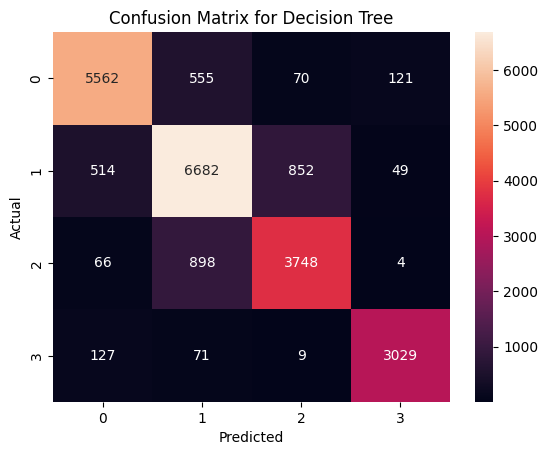

In [ ]:
sns.heatmap(confusion_matrix(y_pred=y_preds,y_true=y_test),annot=True,fmt = "g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Decision Tree")

In [ ]:
accuracy_score(y_test,y_preds)

0.8507849890414635

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RFC = RandomForestClassifier()
RFC.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred = RFC.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     16412
           1       0.93      0.95      0.94     21286
           2       0.93      0.89      0.91      9413
           3       0.98      0.97      0.97      8477

    accuracy                           0.94     55588
   macro avg       0.95      0.94      0.94     55588
weighted avg       0.94      0.94      0.94     55588



In [ ]:
accuracy_score(y_test,y_pred)

0.9426135137079945

In [ ]:
con = confusion_matrix(y_true=y_test,y_pred=y_pred)

Text(0.5, 1.0, 'Confusion Matrix for Random Forest')

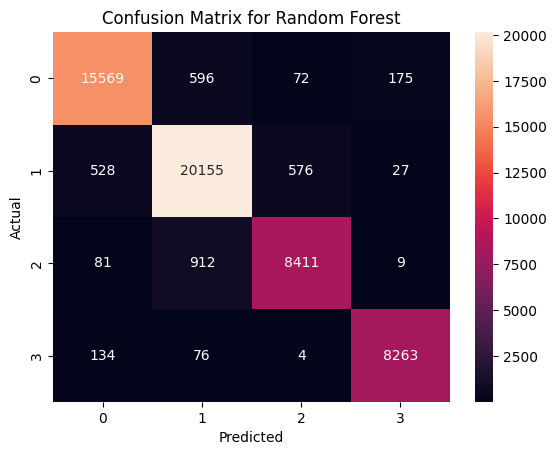

In [ ]:
sns.heatmap(con,annot=True,fmt = 'g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Random Forest")

In [ ]:
# Separate features and URIs
features_uri = df.drop(columns=["labels", "uri"])
uris = df["uri"].values

# Normalize the features
scaler = StandardScaler()
features_scaled_uri = scaler.fit_transform(features_uri)

# Define the function to find top 5 closest URIs using Euclidean distance
def get_closest_uris(input_uri, features_scaled, uris, top_n=5):
    try:
        idx = np.where(uris == input_uri)[0][0]
        input_vector = features_scaled[idx].reshape(1, -1)
        distances = euclidean_distances(features_scaled, input_vector).flatten()
        closest_indices = np.argsort(distances)[1:top_n+1]
        return uris[closest_indices]
    except IndexError:
        return f"URI '{input_uri}' not found in the dataset."

# Example usage with a URI from the dataset
example_uri = uris[100]
closest_uris = get_closest_uris(example_uri, features_scaled_uri, uris)
print(example_uri)
closest_uris


spotify:track:3BuPop8SzLG2Q88TJcFAjp


array(['spotify:track:581mukhDjta60CCwpvnjL9',
       'spotify:track:56oC5buLanioZDYpK2q94t',
       'spotify:track:6ahfbX000c2xn12mkM74g6',
       'spotify:track:6PDL4t1R5m3kYN2qIumKc1',
       'spotify:track:0dzqA1tqLjh0jpakWZb505'], dtype=object)